**Primeira Prova - parte prática**<br><br>
**Compreenda os dados, faça o pré-processamento, treine e avalie um modelo de aprendizado de máquina utilizando o dataset prova1A.**<br><br>
**O objetivo é predizer as vendas.**<br><br>
**Treine dois modelos: Regressão Linear e Random Forest.**<br><br><br>

**1 – Importe os pacotes necessários**

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew, kurtosis

**2 – Carregue e exiba os dados**

In [323]:
vendas = pd.read_csv('prova1A.csv')

In [324]:
vendas

,vendas,concorrencia,renda,publicidade,populacao,preco,prateleira,idade,escolaridade
0,9.50,138,73,11,276,NaN,ruim,42.0,17
1,11.22,111,48,16,260,83.0,bom,65.0,10
2,10.06,113,35,10,269,NaN,medio,59.0,12
3,7.40,117,100,4,466,97.0,medio,55.0,14
4,4.15,141,64,3,340,128.0,ruim,38.0,13
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,bom,33.0,14
396,6.14,139,23,3,37,120.0,medio,55.0,11
397,7.41,162,26,12,368,159.0,medio,40.0,18
398,5.94,100,79,7,284,95.0,ruim,50.0,12


**3 – Compreenda e descreva os dados utilizando métodos do dataframe, histogramas, e as funções skew e kurtosis para entender a distribuição. Se houver valores ausentes, use o método dropna(): skew(df['coluna'].dropna())**

In [325]:
vendas.head() # Exibe as primeiras linhas do dataset

,vendas,concorrencia,renda,publicidade,populacao,preco,prateleira,idade,escolaridade
0,9.50,138,73,11,276,NaN,ruim,42.0,17
1,11.22,111,48,16,260,83.0,bom,65.0,10
2,10.06,113,35,10,269,NaN,medio,59.0,12
3,7.40,117,100,4,466,97.0,medio,55.0,14
4,4.15,141,64,3,340,128.0,ruim,38.0,13


In [326]:
vendas.describe() # Informações descritivas do dataset

,vendas,concorrencia,renda,publicidade,populacao,preco,idade,escolaridade
count,400.000000,400.000000,400.000000,400.000000,400.000000,365.000000,363.000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.216438,53.000,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.896520,16.183,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,99.000000,39.000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,116.000000,54.000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,65.500,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000,18.000000


In [327]:
vendas.info() # Informações de tipo de composição do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vendas        400 non-null    float64
 1   concorrencia  400 non-null    int64  
 2   renda         400 non-null    int64  
 3   publicidade   400 non-null    int64  
 4   populacao     400 non-null    int64  
 5   preco         365 non-null    float64
 6   prateleira    400 non-null    object 
 7   idade         363 non-null    float64
 8   escolaridade  400 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


In [328]:
vendas.isnull().sum() # Quantidade de variaveis nulas no dataset por coluna

vendas           0
concorrencia     0
renda            0
publicidade      0
populacao        0
preco           35
prateleira       0
idade           37
escolaridade     0
dtype: int64

In [329]:
vendas.isna().sum() # Quantidade de variaveis não numéricas no dataset por coluna

vendas           0
concorrencia     0
renda            0
publicidade      0
populacao        0
preco           35
prateleira       0
idade           37
escolaridade     0
dtype: int64

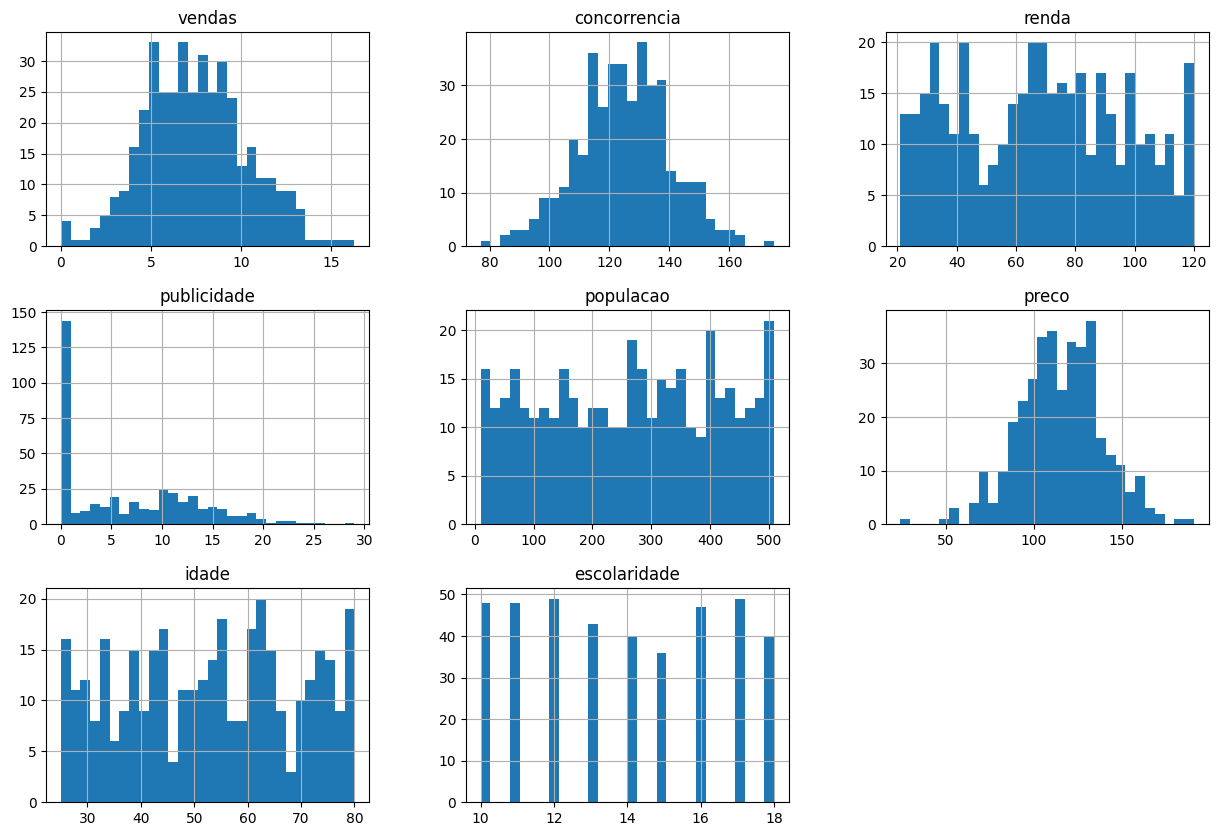

In [330]:
# Exibe os histogramas por coluna do dataset
vendas.hist(bins=30, figsize=(15,10))
plt.show()

In [331]:
# Mostra as funções skew e kurtosis de cada uma das colunas numéricas usando 'np.number'
# Exclui as variáveis que são não numéricas das colunas
for col in vendas.select_dtypes(include=np.number).columns:
    print(f'{col} - Skew: {skew(vendas[col].dropna())}, Kurtosis: {kurtosis(vendas[col].dropna())}')

vendas - Skew: 0.18486378570906228, Kurtosis: -0.09483252594510949
concorrencia - Skew: -0.04259407832336863, Kurtosis: 0.02618479895111081
renda - Skew: 0.0492588776505446, Kurtosis: -1.0867328674702956
publicidade - Skew: 0.6371848217963743, Kurtosis: -0.5532902645143785
populacao - Skew: -0.051034337790194374, Kurtosis: -1.2023044689917621
preco - Skew: -0.09535500189143324, Kurtosis: 0.47674703897463244
idade - Skew: -0.036126920660164444, Kurtosis: -1.1354431721380078
escolaridade - Skew: 0.04384162962350939, Kurtosis: -1.2971218498588095


**4 – Divida os dados em treinamento e teste, utilizando o parâmetro stratify da função train_test_split() para garantir a mesma proporção de tipos de combustível nos conjuntos de treino e teste (use os dois últimos números do seu RA para o parâmetro random_state)**

In [332]:
# Frequência de valores únicos para a pratileira
vendas['prateleira'].value_counts()

prateleira
medio    219
ruim      96
bom       85
Name: count, dtype: int64

In [333]:
# Dados de treino e de teste
train, test = train_test_split(vendas, test_size=0.2, stratify=vendas['prateleira'], random_state=8) # Meu RA é final 08, mas como não aceita 08 coloquei apenas 8

**5 – Explore as correlações: crie gráficos de dispersão e utilize o método corr() do dataframe para encontrar correlações entre os preditores e entre os preditores e o target**

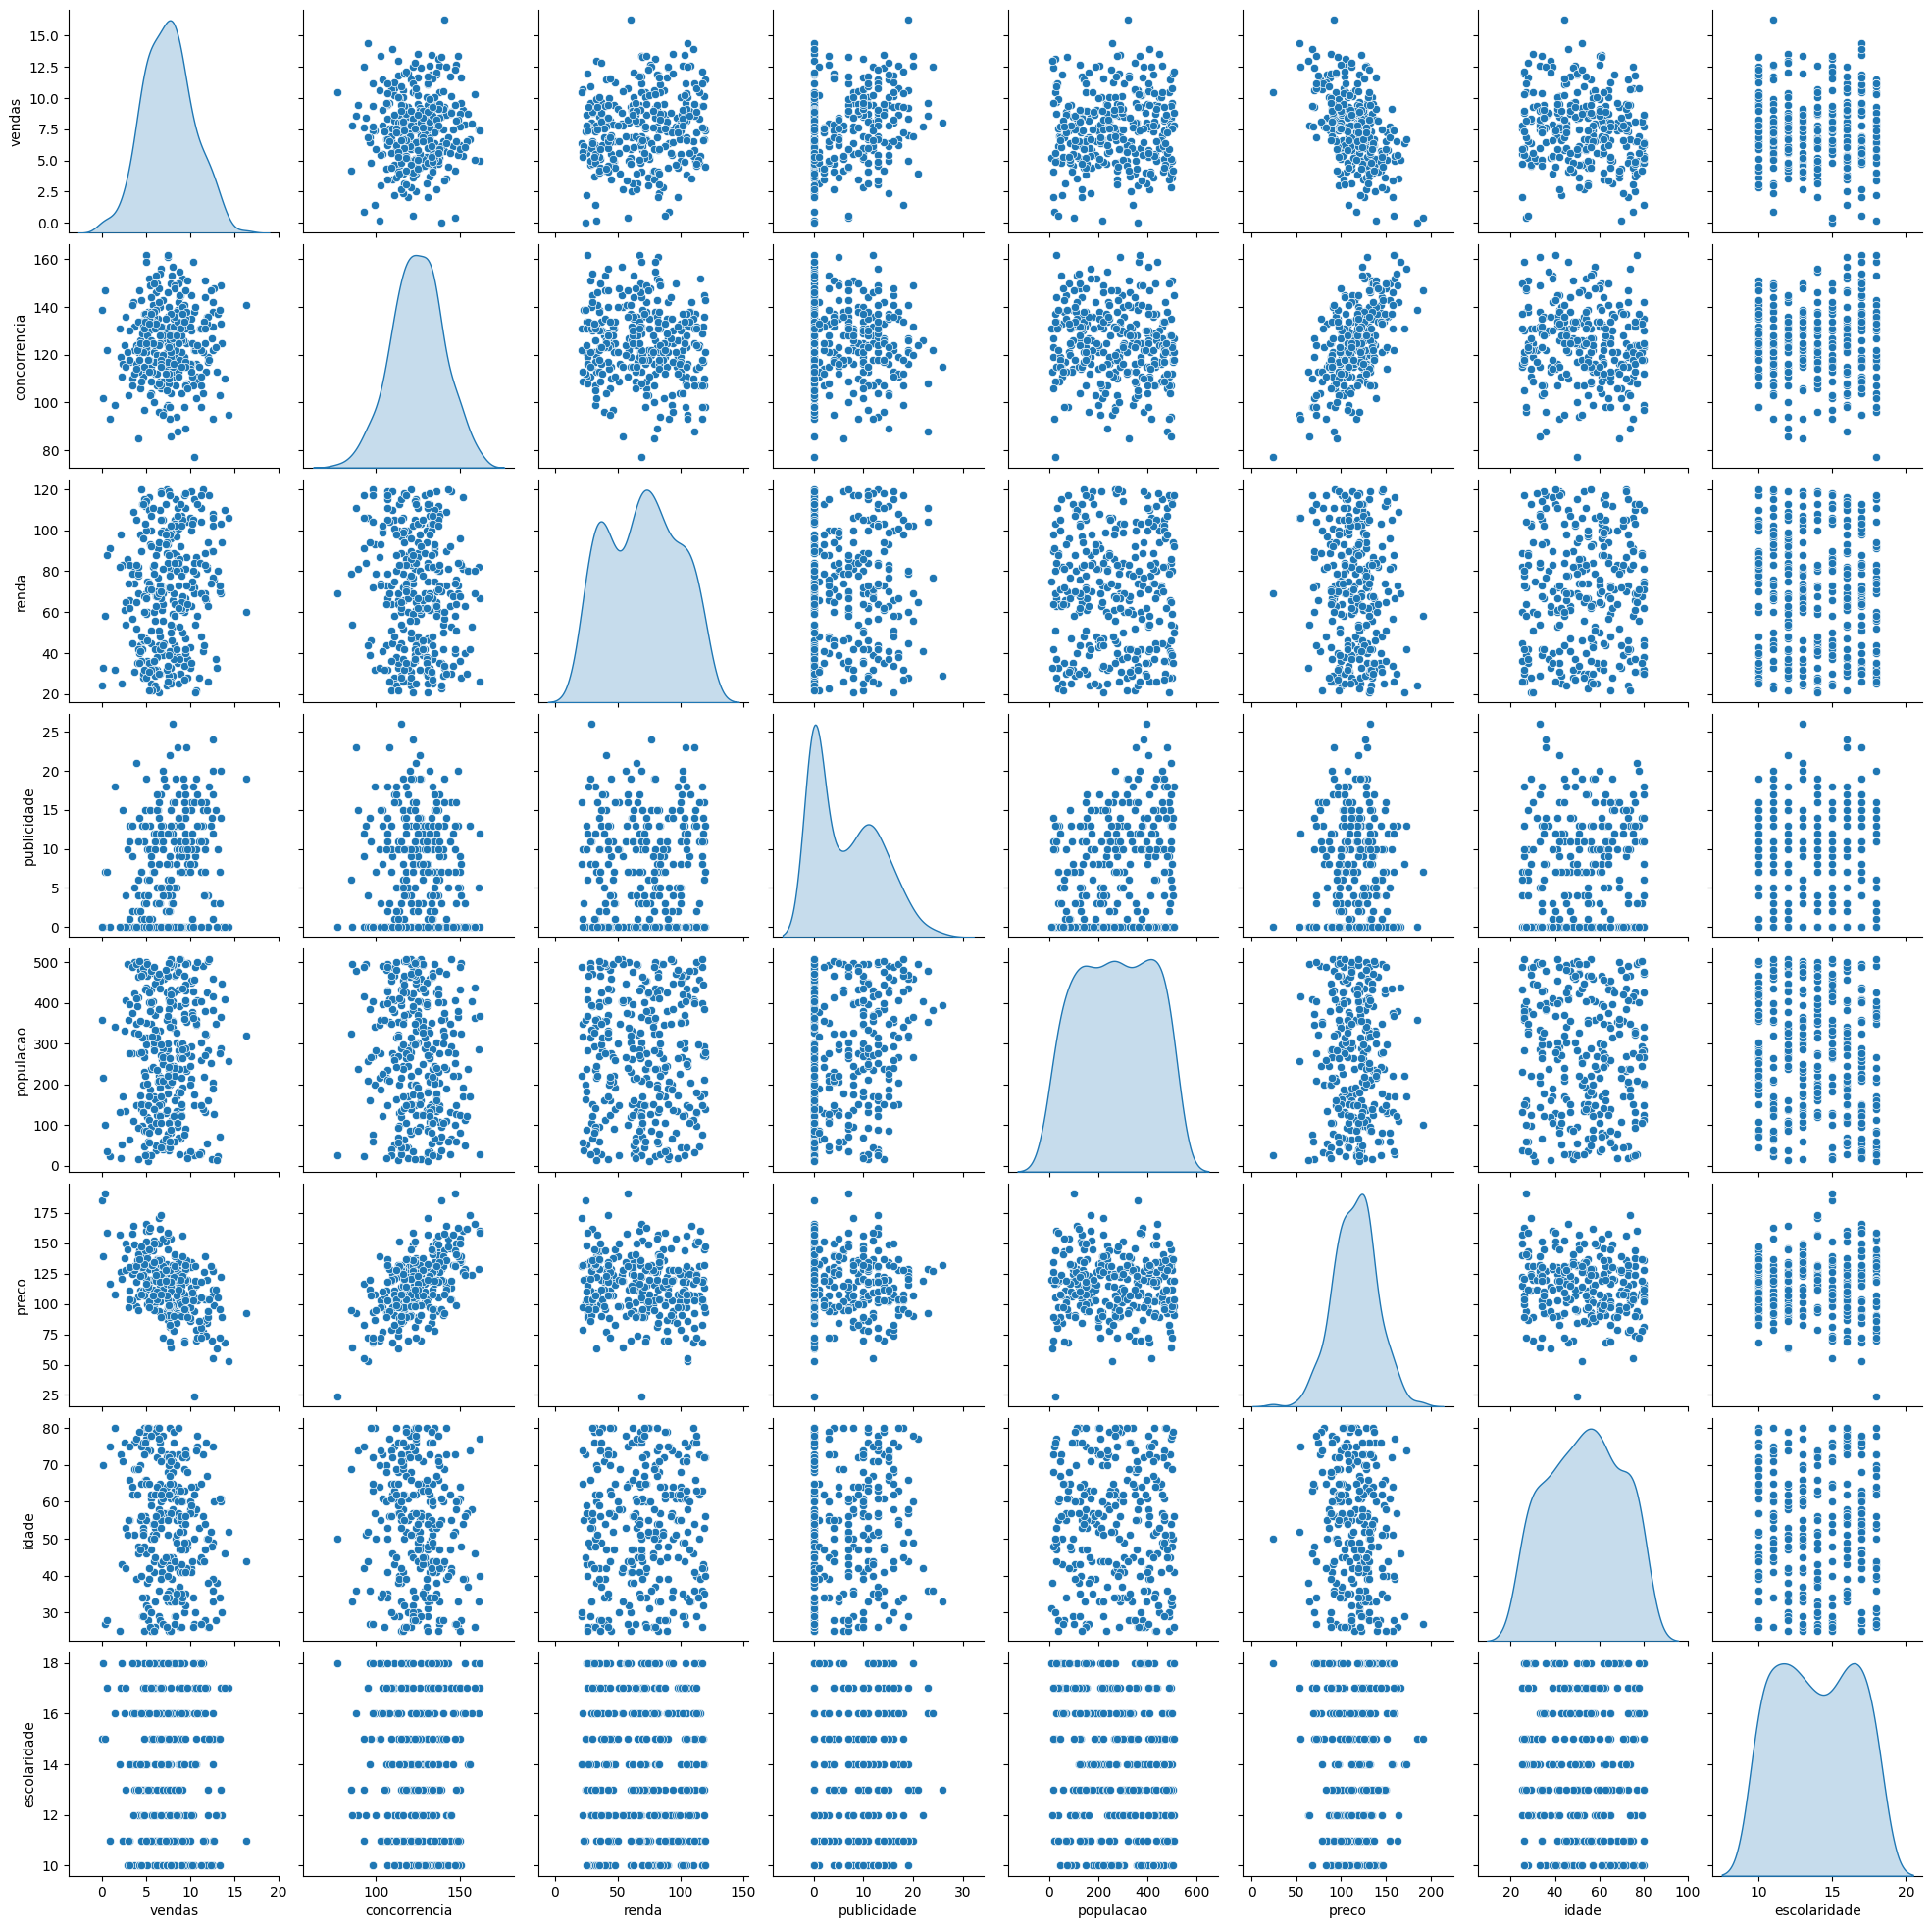

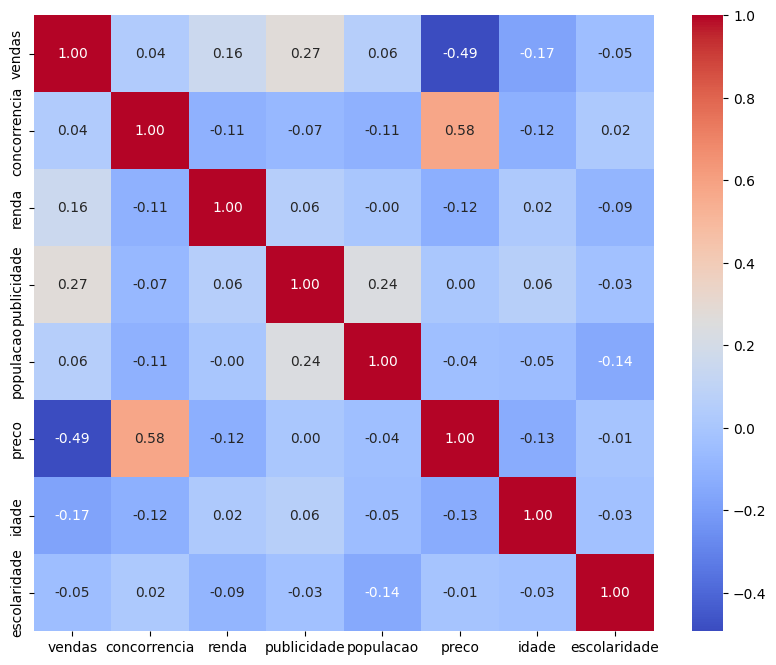

In [334]:
# Gráficos de dispersão e correlações
sns.pairplot(train, diag_kind='kde')
plt.show()

# Matriz de correlação
corr_matrix = train.drop(labels=['prateleira'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**6 – Crie combinações de preditores relevantes para melhorar o desempenho dos modelos**

In [335]:
# As únicas correlações aparentemente fortes são entre preço e vendas e preço e concorrência
train['vendas_por_preco'] = train['vendas'] / train['preco']
train['preco_atraves_concorrencia'] = train['preco'] / train['concorrencia']

In [336]:
# Exibe o dataset com os novos campos
train

,vendas,concorrencia,renda,publicidade,populacao,preco,prateleira,idade,escolaridade,vendas_por_preco,preco_atraves_concorrencia
52,7.91,153,40,3,112,129.0,ruim,39.0,18,0.061318,0.843137
395,12.57,138,108,17,203,128.0,bom,33.0,14,0.098203,0.927536
26,8.33,107,115,11,496,131.0,bom,50.0,11,0.063588,1.224299
23,5.87,121,31,0,292,109.0,medio,79.0,10,0.053853,0.900826
170,8.01,128,39,12,356,118.0,medio,71.0,10,0.067881,0.921875
...,...,...,...,...,...,...,...,...,...,...,...
118,7.57,112,88,2,243,99.0,medio,62.0,11,0.076465,0.883929
380,9.64,106,64,10,17,89.0,medio,68.0,17,0.108315,0.839623
384,12.85,123,37,15,348,112.0,bom,28.0,12,0.114732,0.910569
194,7.23,112,98,18,481,128.0,medio,45.0,11,0.056484,1.142857


In [337]:
# corr_matrix novamente
corr_matrix = train.drop(['prateleira'], axis=1).corr()
corr_matrix['vendas'].sort_values(ascending=False)

# A relação de vendas por preço se mostrou eficiente e um grau de correlação alto
# Já a de preço sobre concorrência foi um pouco abaixo, porém o indice mais alto depois da acima.

vendas                        1.000000
vendas_por_preco              0.800884
publicidade                   0.272149
renda                         0.158519
populacao                     0.055142
concorrencia                  0.036588
escolaridade                 -0.045587
idade                        -0.174073
preco                        -0.493129
preco_atraves_concorrencia   -0.611697
Name: vendas, dtype: float64

**7 – Separe os preditores e o target**

In [1]:
# 7. Separar preditores e target
X_train = train.drop(columns=['vendas'], axis=1)
y_train = train['vendas']
#preditores e alvo
X_train, y_train

NameError: name 'train' is not defined

**8 – Verifique e trate dados ausentes, caso existam**

In [359]:
# Coloca ou remove valores não numéricos
imputer = SimpleImputer(strategy='mean')
X_train_preds_si = X_train.drop(labels=['prateleira'], axis=1)
X = imputer.fit_transform(X_train_preds_si)

# novo dataframe
vendas_train_preds_si = pd.DataFrame(X, columns=X_train_preds_si.columns, index=X_train_preds_si.index)
vendas_train_preds_si

,concorrencia,renda,publicidade,populacao,preco,idade,escolaridade,vendas_por_preco,preco_atraves_concorrencia
52,153.0,40.0,3.0,112.0,129.0,39.0,18.0,0.061318,0.843137
395,138.0,108.0,17.0,203.0,128.0,33.0,14.0,0.098203,0.927536
26,107.0,115.0,11.0,496.0,131.0,50.0,11.0,0.063588,1.224299
23,121.0,31.0,0.0,292.0,109.0,79.0,10.0,0.053853,0.900826
170,128.0,39.0,12.0,356.0,118.0,71.0,10.0,0.067881,0.921875
...,...,...,...,...,...,...,...,...,...
118,112.0,88.0,2.0,243.0,99.0,62.0,11.0,0.076465,0.883929
380,106.0,64.0,10.0,17.0,89.0,68.0,17.0,0.108315,0.839623
384,123.0,37.0,15.0,348.0,112.0,28.0,12.0,0.114732,0.910569
194,112.0,98.0,18.0,481.0,128.0,45.0,11.0,0.056484,1.142857


**9 – Trate os dados categóricos, aplicando transformações adequadas**

In [341]:
label_encoder = LabelEncoder() # Usa o label encoder para transformar variáveis (texto)
# categóricas em numéricas com correspondencia
# exemplo: 1 - média, 2 - bom e por ai vai.
X_train['prateleira'] = label_encoder.fit_transform(X_train['prateleira'])

In [342]:
vendas_train_cat = X_train[['prateleira']]

# A codificação one-hot converte cada categoria em uma coluna binária (0 ou 1).
cat_encode = OneHotEncoder()
vendas_train_cat_1hot = cat_encode.fit_transform(vendas_train_cat)

vendas_train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 320 stored elements and shape (320, 3)>

**10 – Padronize os dados utilizando o StandardScaler**

In [343]:
#6 - Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(vendas_train_preds_si)

vendas_train_preds_si_sc = pd.DataFrame(X,
                                 columns=vendas_train_preds_si.columns,
                                 index=vendas_train_preds_si.index)

vendas_train_preds_si_sc_1hot = vendas_train_preds_si_sc.copy()
vendas_train_preds_si_sc_1hot.head(3)

,concorrencia,renda,publicidade,populacao,preco,idade,escolaridade,vendas_por_preco,preco_atraves_concorrencia
52,1.839587,-1.055671,-0.545469,-1.058616,0.584015,-0.916086,1.559041,-0.247425,-0.541119
395,0.863247,1.359574,1.585047,-0.441757,0.540624,-1.303746,0.028694,0.630065,-0.001156
26,-1.154522,1.608202,0.671969,1.544393,0.670798,-0.205376,-1.119067,-0.193423,1.897458


**11 – Treine e avalie os modelos: Utilize a métrica RMSE (Root Mean Square Error) para avaliar o desempenho dos modelos**

In [344]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg,
                              vendas_train_preds_si_sc_1hot,
                              X,
                              scoring='neg_mean_squared_error',
                              cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores_train = lin_rmse_scores.mean() # RSME
lin_rmse_scores_train

np.float64(1.0922756568368633e-15)

In [345]:
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              vendas_train_preds_si_sc_1hot,
                              X,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)
forest_rmses_scores_train = forest_rmses.mean() # RSME
forest_rmses_scores_train

np.float64(0.4946846572045822)

**12 – Avalie o modelo com o conjunto de teste, também utilizando a métrica RMSE**

In [346]:
# 1 - fazer cópia do strat_test_set
test_cp = test.copy()
test_cp

,vendas,concorrencia,renda,publicidade,populacao,preco,prateleira,idade,escolaridade
90,5.33,115,22,0,491,NaN,medio,64.0,11
39,3.24,130,60,0,144,138.0,ruim,38.0,10
20,6.41,125,90,2,367,131.0,medio,35.0,18
178,10.66,104,71,14,89,81.0,medio,25.0,14
37,4.95,121,41,5,412,110.0,medio,54.0,10
...,...,...,...,...,...,...,...,...,...
45,4.56,141,63,0,168,135.0,ruim,44.0,12
300,8.57,116,78,1,158,99.0,medio,45.0,11
332,5.74,106,33,20,354,104.0,medio,61.0,12
286,7.53,117,118,11,429,113.0,medio,67.0,18


In [347]:
# 2 - combinar features
test_cp['vendas_por_preco'] = test_cp['vendas'] / test_cp['preco']
test_cp['preco_atraves_concorrencia'] = test_cp['preco'] / test_cp['concorrencia']

In [348]:
# 3 separar preditores e valores-alvos
# 7. Separar preditores e target
X_test = test_cp.drop(columns=['vendas'])
y_test = test_cp['vendas']
X_test, y_test

(     concorrencia  renda  publicidade  populacao  preco prateleira  idade  \
 90            115     22            0        491    NaN      medio   64.0   
 39            130     60            0        144  138.0       ruim   38.0   
 20            125     90            2        367  131.0      medio   35.0   
 178           104     71           14         89   81.0      medio   25.0   
 37            121     41            5        412  110.0      medio   54.0   
 ..            ...    ...          ...        ...    ...        ...    ...   
 45            141     63            0        168  135.0       ruim   44.0   
 300           116     78            1        158   99.0      medio   45.0   
 332           106     33           20        354  104.0      medio   61.0   
 286           117    118           11        429  113.0      medio   67.0   
 303           133     52           16        290   99.0      medio   43.0   
 
      escolaridade  vendas_por_preco  preco_atraves_concorrenc

In [349]:
# 4 - remover valores nulos
# Coloca ou remove valores não numéricos
imputer = SimpleImputer(strategy='mean')
X_test_preds_si = X_test.drop(labels=['prateleira'], axis=1)
X = imputer.fit_transform(X_test_preds_si)

In [350]:
# 5 - montar um daframe com o X
vendas_test_preds_si = pd.DataFrame(X, columns=X_test_preds_si.columns, index=X_test_preds_si.index)
vendas_test_preds_si

,concorrencia,renda,publicidade,populacao,preco,idade,escolaridade,vendas_por_preco,preco_atraves_concorrencia
90,115.0,22.0,0.0,491.0,113.873239,64.0,11.0,0.072678,0.904402
39,130.0,60.0,0.0,144.0,138.000000,38.0,10.0,0.023478,1.061538
20,125.0,90.0,2.0,367.0,131.000000,35.0,18.0,0.048931,1.048000
178,104.0,71.0,14.0,89.0,81.000000,25.0,14.0,0.131605,0.778846
37,121.0,41.0,5.0,412.0,110.000000,54.0,10.0,0.045000,0.909091
...,...,...,...,...,...,...,...,...,...
45,141.0,63.0,0.0,168.0,135.000000,44.0,12.0,0.033778,0.957447
300,116.0,78.0,1.0,158.0,99.000000,45.0,11.0,0.086566,0.853448
332,106.0,33.0,20.0,354.0,104.000000,61.0,12.0,0.055192,0.981132
286,117.0,118.0,11.0,429.0,113.000000,67.0,18.0,0.066637,0.965812


In [351]:
# 6 - OneHotEncoder
vendas_test_cat = X_test[['prateleira']]
cat_encode = OneHotEncoder()
vendas_test_cat_1hot = cat_encode.fit_transform(vendas_test_cat)
vendas_test_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80 stored elements and shape (80, 3)>

In [352]:
# 7 - scaler
scaler = StandardScaler()
X = scaler.fit_transform(vendas_test_preds_si)

In [353]:
# 8 - criar dataframe escalado
vendas_test_preds_si_sc = pd.DataFrame(X,
                                 columns=vendas_test_preds_si.columns,
                                 index=vendas_test_preds_si.index)

vendas_test_preds_si_sc_1hot = vendas_test_preds_si_sc.copy()
vendas_test_preds_si_sc_1hot.head(3)

,concorrencia,renda,publicidade,populacao,preco,idade,escolaridade,vendas_por_preco,preco_atraves_concorrencia
90,-0.724290,-1.587959,-0.988856,1.650356,-6.542475e-16,0.779310,-1.065170,3.721765e-16,0.000000
39,0.270158,-0.164788,-0.988856,-0.741015,1.110762e+00,-0.949207,-1.445588,-1.319448e+00,1.194291
20,-0.061324,0.958768,-0.699611,0.795803,7.884916e-01,-1.148651,1.597755,-6.368448e-01,1.091394


In [354]:
# 9 - treinar
from sklearn.model_selection import cross_val_score

# Linear Regression

lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg,
                              vendas_test_preds_si_sc_1hot,
                              X,
                              scoring='neg_mean_squared_error',
                              cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores_test = lin_rmse_scores.mean() # RSME

# Random Forest
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              vendas_test_preds_si_sc_1hot,
                              X,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)
forest_rmses_scores_test = forest_rmses.mean() # RSME

In [355]:
print("Regressão Linear: Treino - "+ str(lin_rmse_scores_train) +" | Teste - " + str(lin_rmse_scores_test))
print("Random Forest: Treino - "+ str(forest_rmses_scores_train) +" | Teste - " + str(forest_rmses_scores_test))

Regressão Linear: Treino - 1.0922756568368633e-15 | Teste - 1.1560492476013565e-15
Random Forest: Treino - 0.4946846572045822 | Teste - 0.6289740580670854


In [356]:
vendasSP = pd.read_csv('prova1A.csv')

vendasSP = vendasSP.drop('prateleira', axis=1)

vendasSP_train_preds = vendasSP.drop('vendas', axis=1)
vendasSP_train_labels = vendasSP['vendas'].copy()

In [357]:
# Roda novamente o modelo usando Random Forest
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              vendasSP_train_preds,
                              vendasSP_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)
forest_rmses.mean()

np.float64(2.260638406620841)